In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.decomposition import PCA, NMF
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Vivek.Sasikumar\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
dataset_train = pd.read_csv('EQB.TO.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-05,55.000000,55.900002,53.700001,53.810001,52.103001,91700
1,2016-10-06,54.349998,54.599998,53.200001,53.439999,51.744732,50500
2,2016-10-07,53.509998,53.529999,50.849998,52.139999,50.485981,142300
3,2016-10-11,52.009998,53.669998,51.750000,53.139999,51.454247,111600
4,2016-10-12,52.970001,54.000000,52.889999,53.549999,51.851250,52000


In [5]:
train = dataset_train.iloc[:,1:2].values

In [6]:
train

array([[55.      ],
       [54.349998],
       [53.509998],
       [52.009998],
       [52.970001],
       [53.400002],
       [52.779999],
       [53.      ],
       [53.310001],
       [55.02    ],
       [54.299999],
       [54.299999],
       [54.32    ],
       [54.009998],
       [54.75    ],
       [54.299999],
       [53.009998],
       [52.889999],
       [52.5     ],
       [51.77    ],
       [51.23    ],
       [50.990002],
       [51.169998],
       [52.610001],
       [51.02    ],
       [52.970001],
       [54.799999],
       [50.880001],
       [52.43    ],
       [53.669998],
       [53.990002],
       [54.919998],
       [56.360001],
       [56.450001],
       [56.790001],
       [57.990002],
       [58.419998],
       [57.990002],
       [58.84    ],
       [59.990002],
       [60.950001],
       [59.950001],
       [60.200001],
       [60.209999],
       [59.970001],
       [61.      ],
       [63.150002],
       [63.689999],
       [62.209999],
       [62.049999],


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train)

In [8]:
training_set_scaled.shape

(502, 1)

## Creating a dataset with 60 time steps

In [22]:
X_train = []
y_train = []
for i in range(90,412):
    X_train.append(training_set_scaled[i-90:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape[0],X_train.shape[1]

(322, 90)

## Reshaping the dataset

In [24]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1) )

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [13]:
regressor = Sequential()

### First LSTM Layer

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1) ))
regressor.add(Dropout(0.2))

### Second LSTM Layer

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Third LSTM Layer

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Fourth LSTM Layer

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Output Layer

In [18]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train the RNN

In [65]:
regressor.fit(X_train, y_train, epochs = 100,batch_size = 32)

Epoch 1/100
322/322 [==============================] - ETA: 1:05 - loss: 0.260 - ETA: 31s - loss: 0.268 - ETA: 19s - loss: 0.26 - ETA: 13s - loss: 0.24 - ETA: 9s - loss: 0.2215 - ETA: 7s - loss: 0.198 - ETA: 4s - loss: 0.173 - ETA: 3s - loss: 0.162 - ETA: 1s - loss: 0.151 - ETA: 0s - loss: 0.143 - 13s 40ms/step - loss: 0.1429
Epoch 2/100
322/322 [==============================] - ETA: 3s - loss: 0.023 - ETA: 3s - loss: 0.039 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.042 - ETA: 2s - loss: 0.044 - ETA: 1s - loss: 0.044 - ETA: 1s - loss: 0.044 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.042 - 4s 13ms/step - loss: 0.0429
Epoch 3/100
322/322 [==============================] - ETA: 3s - loss: 0.041 - ETA: 3s - loss: 0.030 - ETA: 3s - loss: 0.041 - ETA: 3s - loss: 0.038 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.038 - ETA: 1s - loss: 0.037 - ETA: 1s - loss: 0.038 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.036 - 5s 17ms/step - loss: 0.0358
Epoch 4/100
322/322 [=====

322/322 [==============================] - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - 3s 11ms/step - loss: 0.0147
Epoch 27/100
322/322 [==============================] - ETA: 3s - loss: 0.014 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.011 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - 3s 11ms/step - loss: 0.0149
Epoch 28/100
322/322 [==============================] - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.014 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.014 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - 4s 11ms/step - loss: 0.0154
Epoch 29/100
322/322 [===================

322/322 [==============================] - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.012 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - 3s 11ms/step - loss: 0.0096
Epoch 52/100
322/322 [==============================] - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.011 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - 3s 10ms/step - loss: 0.0102
Epoch 53/100
322/322 [==============================] - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - 4s 11ms/step - loss: 0.0109
Epoch 54/100
322/322 [===================

322/322 [==============================] - ETA: 3s - loss: 0.016 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.009 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 4s 11ms/step - loss: 0.0084
Epoch 77/100
322/322 [==============================] - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 3s 10ms/step - loss: 0.0083
Epoch 78/100
322/322 [==============================] - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.012 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - 3s 10ms/step - loss: 0.0093
Epoch 79/100
322/322 [===================

In [33]:
real_stock_prices = dataset_test.iloc[:,1:2].values

real_stock_prices

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [34]:
dataset_total = pd.concat([dataset_train['Open'], dataset_test['Open']], axis=0)

In [35]:
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [58]:
inputs = train[len(train)-120:]

In [59]:
inputs = inputs.reshape(-1,1)

In [60]:
inputs = sc.transform(inputs)

In [61]:
X_test = []

for i in range(90,120):
    X_test.append(inputs[i-90:i,0])

X_test = np.array(X_test)

In [85]:
real_stock_prices = train[-30:,]

In [63]:
X_test = np.reshape(X_test ,(X_test.shape[0] , X_test.shape[1],1))

In [66]:
predicted_stock_prices = regressor.predict(X_test)

predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

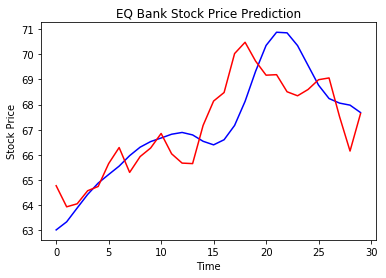

In [71]:
#plt.plot(real_stock_prices, color = 'red', label = 'Real EQ Bank Stock Price')
plt.plot(predicted_stock_prices, color = 'blue', label = 'Predicted EQ Bank Stock Price')
plt.plot(train[-30:,], color = 'red', label = 'Predicted EQ Bank Stock Price')
plt.title('EQ Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [91]:
import math
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
rmse = math.sqrt(mean_squared_error(real_stock_prices, predicted_stock_prices))

In [93]:
print(rmse)

0.9265254577881521


In [72]:
from sklearn.grid_search import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1) ))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')
    return regressor

C:\Users\Vivek.Sasikumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Vivek.Sasikumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [73]:
regressor = KerasRegressor(build_fn=build_regressor)
parameters = {'batch_size':[25],'epochs': [150], 'optimizer': ['adam']}

In [76]:

grid_search = GridSearchCV(estimator = regressor,
                          param_grid = parameters,
                          scoring = 'neg_mean_squared_error',
                          cv = 2)

In [77]:
%%time
grid_search.fit(X_train, y_train)

predicted_stock_prices = grid_search.predict(X_test)

rmse = math.sqrt(mean_squared_error(real_stock_prices, predicted_stock_prices))
print(rmse)

Epoch 1/150
161/161 [==============================] - ETA: 34s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 8s - loss: 0.3558 - ETA: 4s - loss: 0.332 - ETA: 2s - loss: 0.303 - ETA: 0s - loss: 0.279 - 8s 52ms/step - loss: 0.2705
Epoch 2/150
161/161 [==============================] - ETA: 1s - loss: 0.084 - ETA: 1s - loss: 0.050 - ETA: 1s - loss: 0.056 - ETA: 0s - loss: 0.063 - ETA: 0s - loss: 0.062 - ETA: 0s - loss: 0.055 - 2s 15ms/step - loss: 0.0517
Epoch 3/150
161/161 [==============================] - ETA: 1s - loss: 0.025 - ETA: 1s - loss: 0.031 - ETA: 1s - loss: 0.039 - ETA: 0s - loss: 0.037 - ETA: 0s - loss: 0.038 - ETA: 0s - loss: 0.037 - 2s 14ms/step - loss: 0.0362
Epoch 4/150
161/161 [==============================] - ETA: 1s - loss: 0.019 - ETA: 1s - loss: 0.021 - ETA: 1s - loss: 0.022 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.022 - 2s 14ms/step - loss: 0.0224
Epoch 5/150
161/161 [==============================] - ETA: 1s - loss: 0.020 - ETA: 1s - lo

Epoch 37/150
161/161 [==============================] - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - 2s 13ms/step - loss: 0.0088
Epoch 38/150
161/161 [==============================] - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.009 - 2s 12ms/step - loss: 0.0092
Epoch 39/150
161/161 [==============================] - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.012 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - 2s 13ms/step - loss: 0.0099
Epoch 40/150
161/161 [==============================] - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - 2s 15ms/step - loss: 0.0087
Epoch 41/150
161/161 [==============================] - ETA: 1s - loss: 0.005 - ETA: 1s 

Epoch 73/150
161/161 [==============================] - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - 3s 16ms/step - loss: 0.0067
Epoch 74/150
161/161 [==============================] - ETA: 2s - loss: 0.003 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 13ms/step - loss: 0.0065
Epoch 75/150
161/161 [==============================] - ETA: 1s - loss: 0.003 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - 2s 14ms/step - loss: 0.0074
Epoch 76/150
161/161 [==============================] - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 2s 13ms/step - loss: 0.0059
Epoch 77/150
161/161 [==============================] - ETA: 1s - loss: 0.007 - ETA: 1s 

Epoch 109/150
161/161 [==============================] - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 2s 13ms/step - loss: 0.0053
Epoch 110/150
161/161 [==============================] - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 2s 13ms/step - loss: 0.0050
Epoch 111/150
161/161 [==============================] - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 2s 12ms/step - loss: 0.0054
Epoch 112/150
161/161 [==============================] - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 13ms/step - loss: 0.0059
Epoch 113/150
161/161 [==============================] - ETA: 1s - loss: 0.004 - ETA

161/161 [==============================] - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 14ms/step - loss: 0.0058
Epoch 145/150
161/161 [==============================] - ETA: 2s - loss: 0.004 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 3s 16ms/step - loss: 0.0049
Epoch 146/150
161/161 [==============================] - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 2s 13ms/step - loss: 0.0047
Epoch 147/150
161/161 [==============================] - ETA: 2s - loss: 0.003 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 2s 14ms/step - loss: 0.0044
Epoch 148/150
161/161 [==============================] - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0

Epoch 30/150
161/161 [==============================] - ETA: 1s - loss: 0.024 - ETA: 1s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - 2s 12ms/step - loss: 0.0155
Epoch 31/150
161/161 [==============================] - ETA: 1s - loss: 0.015 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0.014 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - 2s 13ms/step - loss: 0.0174
Epoch 32/150
161/161 [==============================] - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.016 - 2s 11ms/step - loss: 0.0165
Epoch 33/150
161/161 [==============================] - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0.019 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.018 - 2s 13ms/step - loss: 0.0178
Epoch 34/150
161/161 [==============================] - ETA: 1s - loss: 0.020 - ETA: 1s 

Epoch 66/150
161/161 [==============================] - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.017 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - 2s 12ms/step - loss: 0.0128
Epoch 67/150
161/161 [==============================] - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.009 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - 2s 12ms/step - loss: 0.0106
Epoch 68/150
161/161 [==============================] - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - 2s 11ms/step - loss: 0.0128
Epoch 69/150
161/161 [==============================] - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.013 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.012 - 2s 13ms/step - loss: 0.0128
Epoch 70/150
161/161 [==============================] - ETA: 1s - loss: 0.013 - ETA: 1s 

Epoch 102/150
161/161 [==============================] - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - 2s 12ms/step - loss: 0.0104
Epoch 103/150
161/161 [==============================] - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.009 - 2s 11ms/step - loss: 0.0098
Epoch 104/150
161/161 [==============================] - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - 2s 12ms/step - loss: 0.0107
Epoch 105/150
161/161 [==============================] - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.009 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.009 - 2s 13ms/step - loss: 0.0097
Epoch 106/150
161/161 [==============================] - ETA: 1s - loss: 0.020 - ETA

161/161 [==============================] - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.012 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - 2s 12ms/step - loss: 0.0089
Epoch 138/150
161/161 [==============================] - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - 2s 12ms/step - loss: 0.0079
Epoch 139/150
161/161 [==============================] - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.010 - 2s 12ms/step - loss: 0.0098
Epoch 140/150
161/161 [==============================] - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - 2s 12ms/step - loss: 0.0090
Epoch 141/150
161/161 [==============================] - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0

322/322 [==============================] - ETA: 2s - loss: 0.021 - ETA: 2s - loss: 0.031 - ETA: 2s - loss: 0.028 - ETA: 2s - loss: 0.024 - ETA: 2s - loss: 0.023 - ETA: 2s - loss: 0.022 - ETA: 2s - loss: 0.020 - ETA: 1s - loss: 0.019 - ETA: 1s - loss: 0.019 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - 4s 13ms/step - loss: 0.0172
Epoch 15/150
322/322 [==============================] - ETA: 3s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 3s - loss: 0.017 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.020 - ETA: 2s - loss: 0.019 - ETA: 2s - loss: 0.018 - ETA: 1s - loss: 0.019 - ETA: 1s - loss: 0.018 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - 6s 17ms/step - loss: 0.0171
Epoch 16/150
322/322 [==============================] - ETA: 3s - loss: 0.014 - ETA: 4s - loss: 0.012 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.012

322/322 [==============================] - ETA: 3s - loss: 0.015 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - 5s 17ms/step - loss: 0.0099
Epoch 37/150
322/322 [==============================] - ETA: 7s - loss: 0.004 - ETA: 5s - loss: 0.004 - ETA: 5s - loss: 0.004 - ETA: 4s - loss: 0.008 - ETA: 4s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - 6s 18ms/step - loss: 0.0098
Epoch 38/150
322/322 [==============================] - ETA: 4s - loss: 0.013 - ETA: 4s - loss: 0.010 - ETA: 4s - loss: 0.009 - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010

322/322 [==============================] - ETA: 3s - loss: 0.004 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.006 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 4s 14ms/step - loss: 0.0083
Epoch 59/150
322/322 [==============================] - ETA: 4s - loss: 0.008 - ETA: 4s - loss: 0.009 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 6s 19ms/step - loss: 0.0079
Epoch 60/150
322/322 [==============================] - ETA: 6s - loss: 0.003 - ETA: 4s - loss: 0.009 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008

322/322 [==============================] - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 5s 15ms/step - loss: 0.0079
Epoch 81/150
322/322 [==============================] - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.007 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.006 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 5s 15ms/step - loss: 0.0075
Epoch 82/150
322/322 [==============================] - ETA: 3s - loss: 0.003 - ETA: 3s - loss: 0.004 - ETA: 3s - loss: 0.005 - ETA: 3s - loss: 0.005 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006

322/322 [==============================] - ETA: 4s - loss: 0.011 - ETA: 4s - loss: 0.010 - ETA: 4s - loss: 0.010 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 6s 19ms/step - loss: 0.0062
Epoch 103/150
322/322 [==============================] - ETA: 4s - loss: 0.009 - ETA: 4s - loss: 0.007 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.006 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - 7s 21ms/step - loss: 0.0068
Epoch 104/150
322/322 [==============================] - ETA: 5s - loss: 0.010 - ETA: 6s - loss: 0.007 - ETA: 5s - loss: 0.005 - ETA: 5s - loss: 0.006 - ETA: 4s - loss: 0.006 - ETA: 4s - loss: 0.005 - ETA: 3s - loss: 0.006 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.0

Epoch 124/150
322/322 [==============================] - ETA: 4s - loss: 0.015 - ETA: 4s - loss: 0.010 - ETA: 4s - loss: 0.008 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.007 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 5s 17ms/step - loss: 0.0062
Epoch 125/150
322/322 [==============================] - ETA: 3s - loss: 0.003 - ETA: 5s - loss: 0.003 - ETA: 4s - loss: 0.003 - ETA: 4s - loss: 0.004 - ETA: 3s - loss: 0.003 - ETA: 3s - loss: 0.004 - ETA: 2s - loss: 0.004 - ETA: 2s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 5s 17ms/step - loss: 0.0055
Epoch 126/150
322/322 [==============================] - ETA: 4s - loss: 0.006 - ETA: 4s - loss: 0.005 - ETA: 4s - loss: 0.006 - ETA: 4s - loss: 0.005 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.006 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 

Epoch 146/150
322/322 [==============================] - ETA: 3s - loss: 0.003 - ETA: 4s - loss: 0.004 - ETA: 3s - loss: 0.004 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.006 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 5s 16ms/step - loss: 0.0050
Epoch 147/150
322/322 [==============================] - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.006 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 4s 14ms/step - loss: 0.0058
Epoch 148/150
322/322 [==============================] - ETA: 3s - loss: 0.004 - ETA: 3s - loss: 0.004 - ETA: 2s - loss: 0.003 - ETA: 2s - loss: 0.006 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.004 - ETA: 1s - loss: 0.005 - ETA: 

NameError: name 'math' is not defined

In [82]:
predicted_stock_prices = grid_search.predict(X_test)

In [83]:
predicted_stock_prices = predicted_stock_prices.reshape(-1, 1)

In [84]:
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

In [87]:
import math
rmse = math.sqrt(mean_squared_error(real_stock_prices, predicted_stock_prices))
print(rmse)

NameError: name 'mean_squared_error' is not defined

In [90]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [92]:
dataset_test.count()

Date      20
Open      20
High      20
Low       20
Close     20
Volume    20
dtype: int64